# Visualize

Before running this notebook, install the `tempo-embeddings` package in your local environment:

```bash
pip install .
```

See [README.dev.md](../README.dev.md) for more details.

In [32]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Corpus

In [33]:
from io import BytesIO
from zipfile import ZipFile
import urllib
from pathlib import Path

SEMEVAL_DATA_URL = (
    "https://www2.ims.uni-stuttgart.de/data/sem-eval-ulscd/semeval2020_ulscd_eng.zip"
)

SEMEVAL2020_DIR = Path("semeval2020_ulscd_eng")

if SEMEVAL2020_DIR.is_dir():
    print(f"Directory '{SEMEVAL2020_DIR}' already exists, skipping corpus download.")
else:
    with urllib.request.urlopen(SEMEVAL_DATA_URL) as f:
        with ZipFile(BytesIO(f.read())) as zipfile:
            zipfile.extractall()

assert SEMEVAL2020_DIR.is_dir(), f"Directory does not exist: '{SEMEVAL2020_DIR}'"

Directory 'semeval2020_ulscd_eng' already exists, skipping corpus download.


In [34]:
CORPUS1_DIR = SEMEVAL2020_DIR / "corpus1"
CORPUS2_DIR = SEMEVAL2020_DIR / "corpus2"
TRUTH_DIR = SEMEVAL2020_DIR / "truth"

assert CORPUS1_DIR.is_dir(), f"Directory does not exist: '{CORPUS1_DIR}'"
assert CORPUS2_DIR.is_dir(), f"Directory does not exist: '{CORPUS2_DIR}'"
assert TRUTH_DIR.is_dir(), f"Directory does not exist: '{TRUTH_DIR}'"

In [35]:
TOKENS_FILE1 = CORPUS1_DIR / "token" / "ccoha1.txt.gz"
TOKENS_FILE2 = CORPUS2_DIR / "token" / "ccoha2.txt.gz"

assert TOKENS_FILE1.is_file()
assert TOKENS_FILE2.is_file()

In [36]:
import gzip

with gzip.open(TOKENS_FILE1, "rt") as f:
    sentences_1810 = f.readlines()

assert len(sentences_1810) == 253644
sentences_1810[:10]

['He may find himself unexpectedly thrown into new and strange positions ; where , after looking carefully around him , he fears to move , lest by a mistaken step , he should do an injury to the cause , which he has it in his heart to serve .\n',
 'First and foremost , he drew forth from a case , in the corner of his lodgings , a brass-buttoned blue coat , of a popular cut , and fell to beating it over the shoulders and down the back with a yard stick , as if he had under his hand the body and person of his direst enemy in the world : then he twisted the right arm up and dashed at the place where the ribs might have been ; then he fell upon the breasts and pumelled them horribly ; and then , casting aside his stick , he fastened fiercely on the collar and gave the whole a mighty shaking , as if he would have the very life out of it .\n',
 '; it was in the latter city that his great discovery was first made public ; or , rather , it was there that he was first suspected of having made i

In [37]:
with gzip.open(TOKENS_FILE2, "rt") as f:
    sentences_1960 = [line.strip() for line in f]
assert len(sentences_1960) == 353692

sentences_1960[:10]

['Oui , yes , " I mumbled , the linguistic transition now in limbo . "',
 "Let 's say you are contentedly cooking hot dogs on one of the park 's rusted barbecue grills at high noon on this oven-hot day .",
 'CERTAIN KINDS of lighting refuse to lie about the relentless , ineluctableprocess of ageing .',
 "Within the first 50 yards , Diduryk 's men came under heavy fire .",
 'Second , there were significant changes in power relations within the community and between the tribal and federal governments .',
 'The hiss of the sprayer was the loudest sound in the room .',
 'I do not intend to try until the Sienese arrive here .',
 'Thus , in discussion of efficiency , the definition of output is crucial to the argument .',
 'In March he formed the Freedom Front Party and registered to participate in the elections .',
 'The contents of the report , along with a letter and attached orders from the secretary of defense , had prompted his request to have Maj. Sara Brannon report to him .']

# Load Model

In [38]:
from tempo_embeddings.embeddings.model import RobertaModelWrapper

model = RobertaModelWrapper.from_pretrained("roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Process Data

In [39]:
import string
from sklearn.feature_extraction import text

stopwords = set(text.ENGLISH_STOP_WORDS).union(set(string.punctuation))

In [40]:
%autoreload now

from tempo_embeddings.text.corpus import Corpus

corpus_1960 = Corpus.from_lines(sentences_1960, model=model)
print(len(corpus_1960.passages))
corpus_1960

353692


Corpus(None, [Passage('Oui , yes , " I mumbled , the linguistic transition now in limbo . "', {}, None), Passage("Let 's say you are contentedly cooking hot dogs on one of the park 's rusted barbecue grills at high noon on this oven-hot day .", {}, None), Passage('CERTAIN KINDS of lighting refuse to lie about the relentless , ineluctableprocess of ageing .', {}, None), Passage("Within the first 50 yards , Diduryk 's men came under heavy fire .", {}, None), Passage('Second , there were significant changes in power relations within the community and between the tribal and federal governments .', {}, None), Passage('The hiss of the sprayer was the loudest sound in the room .', {}, None), Passage('I do not intend to try until the Sienese arrive here .', {}, None), Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, None), Passage('In March he formed the Freedom Front Party and registered to participate in the elections .', {}, None), Pa

In [41]:
TERM = "efficiency"

subcorpus = corpus_1960.subcorpus(TERM, exact_match=False)
subcorpus

Corpus('efficiency', [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, Highlighting(start=24, end=34, umap_embedding=None)), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}, Highlighting(start=57, end=67, umap_embedding=None)), Passage('Quickly , now , beyond childlike efficiency , he tied his trouser legs protectively around the', {}, Highlighting(start=33, end=43, umap_embedding=None)), Passage('Voice mail can offer significant productivity and efficiency gains , " says Clark . "', {}, Highlighting(start=50, end=60, umap_embedding=None)), Passage('This is very important : trying to improve those two factors will improve throughput , utilization , and overall efficiency .', {}, Highlighting(start=113, end=123, umap_embedding=None)), Passage('So its Virginia facility is smaller 

In [42]:
subcorpus.compute_embeddings()

In [43]:
vectorizer = corpus_1960.tfidf_vectorizer(stop_words=list(stopwords))

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
for passage, distance in subcorpus.nearest_neighbours():
    print(distance, passage)

0.2229660600423813 Passage('While peak efficiency and specific cost control are demanded of engineering management , the programming of the station must be done by the programming department and not by an engineering entity .', {}, Highlighting(start=11, end=21, umap_embedding=array([5.222882, 8.847338], dtype=float32)))
0.25353115797042847 Passage('But we believe that all such developments should take place with a view towards the other four key technology areas , for we believe that the office of the future will leverage innovations in all six technology areas to achieve maximum efficiency and effectiveness .', {}, Highlighting(start=236, end=246, umap_embedding=array([5.1905956, 8.452265 ], dtype=float32)))
0.3296559751033783 Passage('Another step in co-operation and increased efficiency came in 1923 with the creation in Minneapolis of the Northwest Shippers Advisory Board , an', {}, Highlighting(start=43, end=53, umap_embedding=array([4.8871984, 8.409209 ], dtype=float32)))
0.40444

In [45]:
subcorpus.topic_words(vectorizer, 10)

['efficiency',
 'inefficiency',
 'improve',
 'costs',
 'increase',
 'alliance',
 'management',
 'fuel',
 'service',
 'utilization']

-------------------------------
efficiency
0.2229660600423813 Passage('While peak efficiency and specific cost control are demanded of engineering management , the programming of the station must be done by the programming department and not by an engineering entity .', {}, Highlighting(start=11, end=21, umap_embedding=array([5.222882, 8.847338], dtype=float32)))
0.25353115797042847 Passage('But we believe that all such developments should take place with a view towards the other four key technology areas , for we believe that the office of the future will leverage innovations in all six technology areas to achieve maximum efficiency and effectiveness .', {}, Highlighting(start=236, end=246, umap_embedding=array([5.1905956, 8.452265 ], dtype=float32)))
0.3296559751033783 Passage('Another step in co-operation and increased efficiency came in 1923 with the creation in Minneapolis of the Northwest Shippers Advisory Board , an', {}, Highlighting(start=43, end=53, umap_embedding=array([4.88

<Axes: xlabel='x', ylabel='y'>

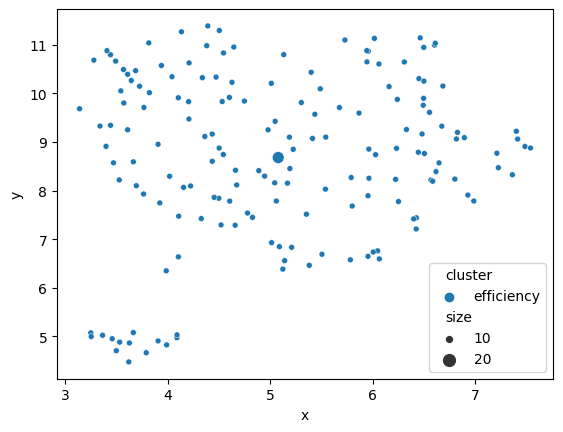

In [46]:
from tempo_embeddings.visualization.clusters import ClusterVisualizer


visualizer = ClusterVisualizer([subcorpus])

visualizer.visualize()

In [47]:
from bokeh.plotting import show

show(visualizer.interactive())

## Cluster

In [48]:
from sklearn.cluster import DBSCAN

clusters = subcorpus.clusters(clusterer=DBSCAN, min_samples=5, n_jobs=-1)
for cluster in clusters:
    print(cluster)
    print(len(cluster.passages))

Corpus(0, [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, Highlighting(start=24, end=34, umap_embedding=array([ 4.3367567, 10.319952 ], dtype=float32))), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}, Highlighting(start=57, end=67, umap_embedding=array([ 3.5411818, 10.04934  ], dtype=float32))), Passage('Quickly , now , beyond childlike efficiency , he tied his trouser legs protectively around the', {}, Highlighting(start=33, end=43, umap_embedding=array([ 6.6024594, 10.989922 ], dtype=float32))), Passage('Voice mail can offer significant productivity and efficiency gains , " says Clark . "', {}, Highlighting(start=50, end=60, umap_embedding=array([4.497003 , 7.8417935], dtype=float32))), Passage('This is very important : trying to improve those two factors will improve thro

In [49]:
for cluster in clusters:
    print("-------------------------------")
    print(cluster)
    centroid = cluster.umap_mean()
    for passage, distance in cluster.nearest_neighbours():
        print(distance, passage)

    top_words = cluster.topic_words(vectorizer, 5)
    print(top_words)

    cluster.set_topic_label(vectorizer, exclude_word=TERM)

-------------------------------
Corpus(0, [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, Highlighting(start=24, end=34, umap_embedding=array([ 4.3367567, 10.319952 ], dtype=float32))), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}, Highlighting(start=57, end=67, umap_embedding=array([ 3.5411818, 10.04934  ], dtype=float32))), Passage('Quickly , now , beyond childlike efficiency , he tied his trouser legs protectively around the', {}, Highlighting(start=33, end=43, umap_embedding=array([ 6.6024594, 10.989922 ], dtype=float32))), Passage('Voice mail can offer significant productivity and efficiency gains , " says Clark . "', {}, Highlighting(start=50, end=60, umap_embedding=array([4.497003 , 7.8417935], dtype=float32))), Passage('This is very important : trying to improve tho

-------------------------------
Corpus(1, [Passage('On defense spending : " The whole question is blatant inefficiency , poor deployment of manpower , contracting idiocy .. .', {}, Highlighting(start=56, end=66, umap_embedding=array([3.9046476, 4.9086766], dtype=float32))), Passage("The report charges the agency 's Senegalese director , General Amadou Mahtar M'Bow , with large-scale inefficiency and mismanagement .", {}, Highlighting(start=104, end=114, umap_embedding=array([3.988213, 4.827778], dtype=float32))), Passage('At that point , I had to wring all the inefficiency out of my routine .', {}, Highlighting(start=41, end=51, umap_embedding=array([3.5295253, 4.8838515], dtype=float32))), Passage('But from those who did appear the commission gathered evidence of appalling inefficiency and waste-much of it directly traceable to union featherbedding practices .', {}, Highlighting(start=78, end=88, umap_embedding=array([3.7886539, 4.666788 ], dtype=float32))), Passage('A year after arri

# Visualize

-------------------------------
improve
0.17575840651988983 Passage('By now I began to understand what reservation efficiency entailed .', {}, Highlighting(start=46, end=56, umap_embedding=array([5.1859555, 9.097713 ], dtype=float32)))
0.20680594444274902 Passage('How the classes of problems are represented is related to problem-solving efficiency .', {}, Highlighting(start=74, end=84, umap_embedding=array([5.046832 , 9.4236145], dtype=float32)))
0.2127060741186142 Passage('His Principles of Management Efficiency deserve to be reproduced , not only for their soundness , but because they are too little recognized and too little observed : 1 .', {}, Highlighting(start=29, end=39, umap_embedding=array([4.9778457, 9.247977 ], dtype=float32)))
0.30007612705230713 Passage('The flimsy argument of teachers who are guilty of the indecent act in public , and claim it does not affect their teaching efficiency , does not deter the', {}, Highlighting(start=123, end=133, umap_embedding=array([5.4113

<Axes: xlabel='x', ylabel='y'>

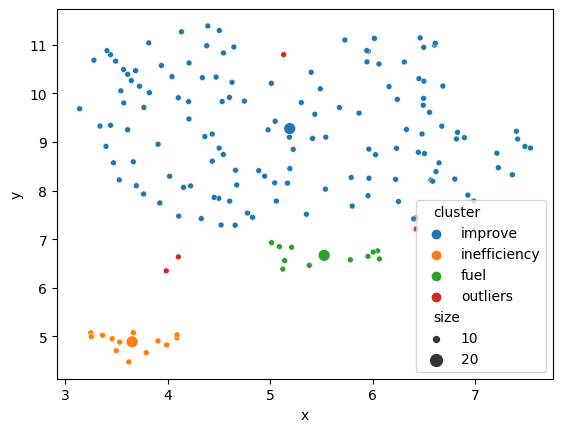

In [50]:
%autoreload now

from tempo_embeddings.visualization.clusters import ClusterVisualizer

visualizer = ClusterVisualizer(clusters)
visualizer.visualize()


In [51]:
from bokeh.plotting import show

show(visualizer.interactive())

### Sub-cluster

In [52]:
len(clusters[0].passages)

136

In [53]:
sub_clusters = clusters[0].clusters(clusterer=DBSCAN, min_samples=10)
sub_clusters

[Corpus(0, [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, Highlighting(start=24, end=34, umap_embedding=array([ 4.3367567, 10.319952 ], dtype=float32))), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}, Highlighting(start=57, end=67, umap_embedding=array([ 3.5411818, 10.04934  ], dtype=float32))), Passage('So its Virginia facility is smaller than many -- with 5,000 servers at the moment , but expandable up to 10,000 -- and packed densely for efficiency .', {}, Highlighting(start=138, end=148, umap_embedding=array([3.5700352, 9.800259 ], dtype=float32))), Passage("As population increases , and as man 's knowledge and skill in directing the forces of nature widen ... the habitual methods of carrying on the life process of the group as a whole , no longer give the same result as

In [55]:
for cluster in sub_clusters:
    cluster.set_topic_label(vectorizer, exclude_word=TERM)
    print(len(cluster.passages), cluster)

26 Corpus('need', [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, Highlighting(start=24, end=34, umap_embedding=array([ 4.3367567, 10.319952 ], dtype=float32))), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}, Highlighting(start=57, end=67, umap_embedding=array([ 3.5411818, 10.04934  ], dtype=float32))), Passage('So its Virginia facility is smaller than many -- with 5,000 servers at the moment , but expandable up to 10,000 -- and packed densely for efficiency .', {}, Highlighting(start=138, end=148, umap_embedding=array([3.5700352, 9.800259 ], dtype=float32))), Passage("As population increases , and as man 's knowledge and skill in directing the forces of nature widen ... the habitual methods of carrying on the life process of the group as a whole , no longer give the same re

In [56]:
visualizer = ClusterVisualizer(sub_clusters)

-------------------------------
need
0.13388146460056305 Passage('We need to invest in our children , and we need to insist on efficiency from our governments .', {}, Highlighting(start=61, end=71, umap_embedding=array([ 3.7236822, 10.144807 ], dtype=float32)))
0.18562626838684082 Passage('The U. S. Market and the Drive for Efficiency : But the', {}, Highlighting(start=35, end=45, umap_embedding=array([ 3.8201976, 10.01228  ], dtype=float32)))
0.21458493173122406 Passage('The sheer realities of efficiency and the economies involved may very well make shippers start demanding it. "', {}, Highlighting(start=23, end=33, umap_embedding=array([ 3.6430805, 10.261375 ], dtype=float32)))
0.24080845713615417 Passage('It is important to observe that to attain efficiency , intelligent scholars as well as senior and experienced lecturers must remain on the job for a relatively long period of time .', {}, Highlighting(start=42, end=52, umap_embedding=array([ 4.040321, 10.340059], dtype=float32)))
0

<Axes: xlabel='x', ylabel='y'>

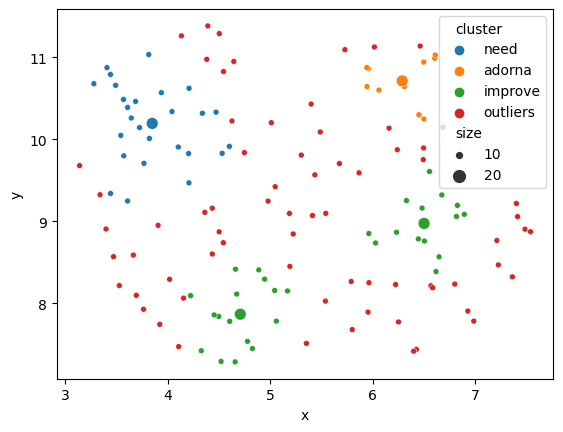

In [57]:
visualizer.visualize()

In [58]:
show(visualizer.interactive())

## Wizmap

In [368]:
# %autoreload now

from tempo_embeddings.visualization.wizmap import WizmapVisualizer

if "visualizer_1960" in locals():
    visualizer_1960.cleanup()

visualizer_1960 = WizmapVisualizer(subcorpus, title="Efficiency in 1960")

In [369]:
port = 8000

visualizer_1960.visualize(port=port)

Start generating data list...
Start generating contours...
Start generating multi-level summaries...


166it [00:00, 236178.58it/s]
100%|██████████| 6/6 [00:00<00:00, 61.93it/s]

Starting server on port 8000


OSError: [Errno 48] Address already in use

# With Times

In [300]:
corpus_1810 = Corpus.from_lines(sentences_1810, model=model)
corpus_1810

Corpus(None, [Passage('He may find himself unexpectedly thrown into new and strange positions ; where , after looking carefully around him , he fears to move , lest by a mistaken step , he should do an injury to the cause , which he has it in his heart to serve .', {}, None), Passage('First and foremost , he drew forth from a case , in the corner of his lodgings , a brass-buttoned blue coat , of a popular cut , and fell to beating it over the shoulders and down the back with a yard stick , as if he had under his hand the body and person of his direst enemy in the world : then he twisted the right arm up and dashed at the place where the ribs might have been ; then he fell upon the breasts and pumelled them horribly ; and then , casting aside his stick , he fastened fiercely on the collar and gave the whole a mighty shaking , as if he would have the very life out of it .', {}, None), Passage('; it was in the latter city that his great discovery was first made public ; or , rather , it w

In [301]:
corpus_1960.set_metadatas("year", "1960")

In [302]:
corpus_1810.set_metadatas("year", "1810")

In [303]:
corpus_all = corpus_1810 + corpus_1960

In [304]:
subcorpus = corpus_all.subcorpus("efficiency", exact_match=False)

In [305]:
subcorpus.compute_embeddings()

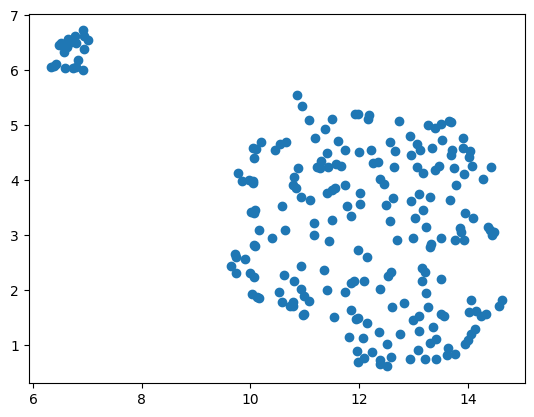

In [306]:
import matplotlib.pyplot as plt
import numpy as np


embeddings = np.array(subcorpus.umap_embeddings())
x = embeddings[:, 0]
y = embeddings[:, 1]
plt.scatter(x=x, y=y)

In [307]:
clusters = subcorpus.clusters(min_cluster_size=5)
print(len(clusters))

2


             x         y  cluster
0    13.269707  1.688321        0
1    12.083641  0.765850        0
2    14.000490  1.103395        0
3    11.347059  2.371603        0
4    13.559537  1.537529        0
..         ...       ...      ...
221   6.922188  5.994008        1
222   6.770472  6.615499        1
223   6.416648  6.106785        1
224   6.472939  6.457219        1
225   6.330418  6.052567        1

[226 rows x 3 columns]


<Axes: xlabel='x', ylabel='y'>

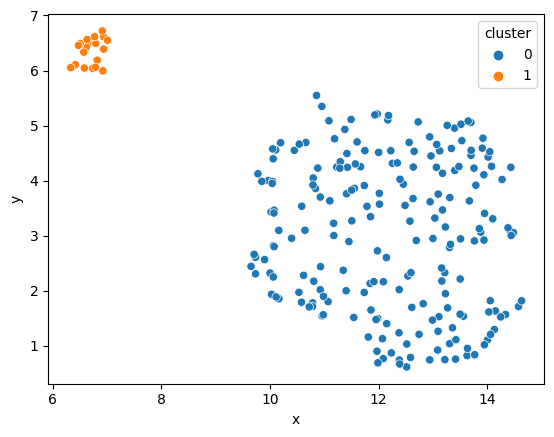

In [309]:
import pandas as pd
import seaborn as sns


rows = []

for cluster in clusters:
    embeddings = cluster.umap_embeddings()

    for embedding in embeddings:
        row = {}
        row["x"] = embedding[0]
        row["y"] = embedding[1]
        row["cluster"] = cluster.label
        rows.append(row)


data = pd.DataFrame(rows)
print(data)
sns.scatterplot(data=data, x="x", y="y", hue="cluster")

In [314]:
%autoreload now

from tempo_embeddings.visualization.wizmap import WizmapVisualizer

if "visualizer_all" in locals():
    # Cleanup previous run
    visualizer_all.cleanup()

visualizer_all = WizmapVisualizer(clusters[1], title="Efficiency in 1810 and 1960")

In [316]:
visualizer_all.visualize(port=port + 1)

Starting server on port 8001


OSError: [Errno 48] Address already in use

# Clean Up

In [317]:
if False:  # Clean up manually when needed
    visualizer_1960.cleanup()
    visualizer_all.cleanup()